# Boundary value problem

### In general case:

$L[y]=y''+p(x)y'+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [251]:
###It`s needed to make a comment.

### Note 1. Difference method of the second order
$$
y'_n = \frac{y_{n+1} - y_{n-1}}{2\tau}
$$
Approximation for secon derivative:
$$
y^{''}_n = \frac{y_{n+1} - 2y_n + y_{n-1}}{\tau^2}
$$
Differential equation:

$y^{''}_n + p_n y'_n + q_n y_n = f_n$

$\frac{y_{n+1} - 2y_n + y_{n-1}}{\tau^2} + p_n \frac{y_{n+1} - y_{n-1}}{2 \tau} + q_n y_n = f_n$

#### Residual equation:

$c_n y_{n+1} - b_n y_n + a_n y_{n-1} = f_n$

$\begin{cases} a_n = \frac{1}{\tau^2} - \frac{1}{2\tau} p_n \\  b_n = a_n + c_n - q_n \\ c_n = \frac{1}{\tau^2} + \frac{1}{2\tau} p_n \end{cases}$

#### Boundary conditions:

$\begin{cases} \alpha_0y_0+\alpha_1y'_0=A \\ \beta_0y_n+\beta_1y'_n=B \end{cases}$

We are compelled to use right-sided deravative at point $a$ and left-sided derivative at point $b$

$\begin{cases} \alpha_0y_0+\alpha_1\frac{y_{1} - y_0}{\tau}=A \\ \beta_0y_N+\beta_1\frac{y_{N} - y_{N-1}}{\tau}=B \end{cases}$

$\begin{cases} a_0 = 0 \\  b_0 = \frac{\alpha_1}{\tau} - \alpha_0 \\ c_0 = \frac{\alpha_1}{\tau} \end{cases}$

$\begin{cases} a_N = -\frac{\beta_1}{\tau} \\  b_N = -\frac{\beta_1}{\tau} - \beta_0 \\c_N = 0 \end{cases}$

### Note 2. One-sided approximation for the fisrt derivative.
$$
y'_n = \frac{y_{n+1} - y_n}{\tau}
$$
Differential equation:

$y^{''}_n + p_n y'_n + q_n y_n = f_n$

$\frac{y_{n+1} - 2y_n + y_{n-1}}{\tau^2} + p_n \frac{y_{n+1} - y_n}{\tau} + q_n y_n = f_n$

#### Residual equation:

$c_n y_{n+1} - b_n y_n + a_n y_{n-1} = d_n$

$\begin{cases} a_n = \frac{1}{\tau^2} \\  b_n = a_n + c_n - q_n \\ c_n = \frac{1}{\tau^2} + \frac{1}{\tau} p_n \end{cases}$

Boundary conditions are same.

In [257]:
###Use 1 function for both methods that call different methods of calculating of vectors a, b.

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

#1.1.
def SecondOrder_ab(N,tau,p,a0):
    a = [1 - p(a0+(i+1)*tau)/2*tau for i in range(N-1)]
    c = [1 + p(a0+(i+1)*tau)/2*tau for i in range(N-1)]
    return np.asarray(a), np.asarray(c)
#1.2.
def FirstOrder_ab(N,tau,p,a0):
    a = [1 for i in range(N-1)]
    c = [1 + p(a0+(i+1)*tau)*tau for i in range(N-1)]
    return np.asarray(a), np.asarray(c)

def N_OrderScheme(order,a0,b0,A,B,alpha,beta,p,q,f,N):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    
    """<=Construct matrix of system: M[y]=[d], [d] = [f(x)]=>"""
    M = np.zeros((N+1, N+1))
    d = np.zeros((N+1))
    tau = (b0-a0)/N
    
    M = M.astype(np.float32)
    d = d.astype(np.float32)
    
    """1) Fill matrix M and vector f elements, corresponding
    to boundary conditions"""
    
    M[0][0] = - (alpha[1]*tau - alpha[0]*tau**2)
    M[0][1] = alpha[1]*tau
    d[0] = A*tau**2
    
    M[N][N-1] = - beta[1]*tau
    M[N][N] = beta[1]*tau + beta[0]*tau**2
    d[N] = B*tau**2
    
    """2) Fill internal elements of matrix M and vector f elements, using residual equasion"""
    """2.1) Get vectors [a], [b], [c], and [d]"""

    if order == 'first':
        a, c = FirstOrder_ab(N,tau,p,a0)
    else:
        a, c = SecondOrder_ab(N,tau,p,a0)
        
    r = np.asarray([q(a0+(i+1)*tau)*tau**2 for i in range(N-1)])
    b = a + c - r
    d1 = np.array([f(a0+(i+1)*tau)*tau**2 for i in range(N-1)])
    
    """2.2) fill the matrix M and vector [f]"""
    
    for i in range(N-1):
        M[i+1][i] = a[i]
        M[i+1][i+1] = -b[i]
        M[i+1][i+2] = c[i]
        
        d[i+1] = d1[i]
    
    y = solve(M,d)
    
    return y

In [265]:
###Set constants

In [266]:
import math

def p(x):
    return -math.log(x)

def q(x):
    return -2

def f(x):
    return 1 

a, b = 0.5, 1.5
alpha, beta = [1,1], [1,-1]
A, B = 1, 0

<=GRAPH FOR 2-nd ORDER METHOD, h = 0.125=>


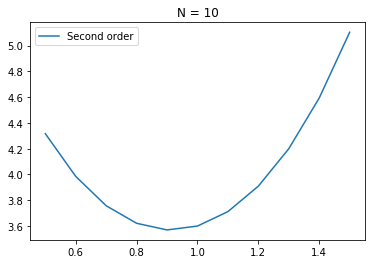

In [267]:
N=10
y = N_OrderScheme('second',a,b,A,B,alpha,beta,p,q,f,N)

print('<=GRAPH FOR 2-nd ORDER METHOD, h = 0.125=>')
x = np.linspace(a, b, N+1)
fig, ax = plt.subplots() 
ax.plot(x, y, label='Second order')
ax.set_title(f"N = {N}")
ax.legend()

In [268]:
def GetIter(order, N, tol):
    """Вычисляет число интерций необходимых для достижения требуемой отн. ошибки"""
    """tol - наибольшая относительная ошибка на сетке значений x"""
    ###Делаем 1-й шаг итерации
    err = 1
    y1 = N_OrderScheme(order,a,b,A,B,alpha,beta,p,q,f,N)
    
    while err > tol:
        
        ###Удваиваем чтисло промежуточных узлов вдвое
        N = N*2
        y2 = N_OrderScheme(order,a,b,A,B,alpha,beta,p,q,f,N)
        
        ###Выбираем значения y2 на узлах предыдущего шага и меряем ошибку
        u = np.array([y2[2*i] for i in range(y1.shape[0])])
        delta = (u-y1)/y1
        err = max([abs(np.max(delta)), abs(np.min(delta))])
        print(f"N = 2e{math.log(N, 2)}, error = {err}")
        
        y1 = y2
        
    return y, N, err

In [269]:
y, N = GetIter('first', 6, tol=1e-4)
print(N)

N = 2e3.5849625007211565, error = 0.7296069264411926
N = 2e4.584962500721157, error = 0.4834440350532532
N = 2e5.584962500721157, error = 0.3001827001571655
N = 2e6.584962500721156, error = 0.17218835651874542
N = 2e7.584962500721156, error = 0.09330122917890549
N = 2e8.584962500721156, error = 0.047839321196079254
N = 2e9.584962500721156, error = 0.01897040195763111


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=5.17882e-08): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=5.99305e-09): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=7.19053e-10): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=8.85872e-11): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=1.11151e-11): result may not be accurate.


N = 2e10.584962500721156, error = 0.001622120733372867


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=1.27763e-12): result may not be accurate.


N = 2e11.584962500721158, error = 0.08688662946224213


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=1.55937e-13): result may not be accurate.


N = 2e12.584962500721158, error = 0.04072292149066925


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=9.78761e-15): result may not be accurate.


N = 2e13.584962500721158, error = 1.1998796463012695


KeyboardInterrupt: 

In [270]:
y, N = GetIter('second', 6, tol=1e-2)
print(N)

N = 2e3.5849625007211565, error = 0.7399806380271912
N = 2e4.584962500721157, error = 0.48703742027282715
N = 2e5.584962500721157, error = 0.2999100685119629
N = 2e6.584962500721156, error = 0.16824263334274292
N = 2e7.584962500721156, error = 0.1190807968378067


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=5.18966e-08): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=5.86626e-09): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=6.99968e-10): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=1.00813e-10): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=5.58565e-12): result may not be accurate.


N = 2e8.584962500721156, error = 0.053645819425582886
N = 2e9.584962500721156, error = 0.13668371737003326
N = 2e10.584962500721156, error = 3.3412537574768066


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=2.88558e-12): result may not be accurate.


N = 2e11.584962500721158, error = 0.7790812849998474


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=1.5031e-12): result may not be accurate.


N = 2e12.584962500721158, error = 1.2864683866500854


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=5.13697e-14): result may not be accurate.


N = 2e13.584962500721158, error = 1.9131625890731812


MemoryError: Unable to allocate 2.25 GiB for an array with shape (24577, 24577) and data type float32

Для метода 2-го порядка достигается относительная точность ~1e-2. Для метода 1-го порядка с односторонней производной - до ~1e-3.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=4.55678e-08): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=4.54788e-08): result may not be accurate.


<=GRAPHS FOR BOTH METHODS, WHEN N = 100=>


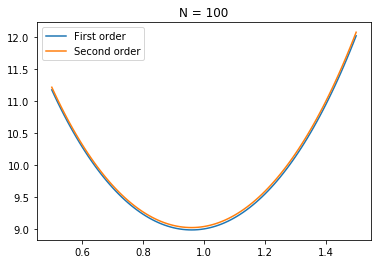

In [271]:
N = 100
y1 = N_OrderScheme('first',a,b,A,B,alpha,beta,p,q,f,N)
y2 = N_OrderScheme('second',a,b,A,B,alpha,beta,p,q,f,N)

print('<=GRAPHS FOR BOTH METHODS, WHEN N = 100=>')
x = np.linspace(a, b, N+1)
fig, ax = plt.subplots() 
ax.plot(x, y1, label='First order')
ax.plot(x, y2, label='Second order')
ax.set_title(f"N = {N}")
ax.legend()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=5.93303e-13): result may not be accurate.


<=AT BIG N SOLUTIONS START DIVERGE, N = 4000=>


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=6.0701e-12): result may not be accurate.


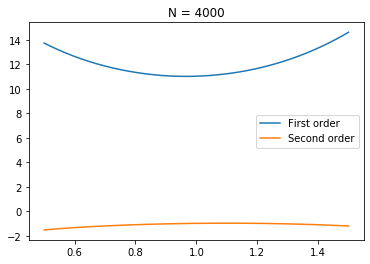

In [272]:
N = 4000
y1 = N_OrderScheme('first',a,b,A,B,alpha,beta,p,q,f,N)
y2 = N_OrderScheme('second',a,b,A,B,alpha,beta,p,q,f,N)

print('<=AT BIG N SOLUTIONS START DIVERGE, N = 4000=>')
x = np.linspace(a, b, N+1)
fig, ax = plt.subplots() 
ax.plot(x, y1, label='First order')
ax.plot(x, y2, label='Second order')
ax.set_title(f"N = {N}")
ax.legend()

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [273]:
def p(x):
    return 2

def q(x):
    return -2*x

def f(x):
    return (2-8*x)/x**3

a, b = 1, 2
alpha, beta = [1, 0], [1, 0]
A, B = 1, 0.5

In [274]:
y, N = GetIter('second', 2, tol=1e-6)
print(N)

N = 2e2.0, error = 0.003245088504627347
N = 2e3.0, error = 0.001006521750241518
N = 2e4.0, error = 0.00026072413311339915
N = 2e5.0, error = 7.549193105660379e-05
N = 2e6.0, error = 0.0001802988990675658
N = 2e7.0, error = 0.0002513909130357206
N = 2e8.0, error = 0.003526515094563365
N = 2e9.0, error = 0.0053350781090557575
N = 2e10.0, error = 0.0005417362553998828


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=2.87427e-08): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=3.58942e-09): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=4.49369e-10): result may not be accurate.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=5.60436e-11): result may not be accurate.


N = 2e11.0, error = 0.019890103489160538


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=7.21311e-12): result may not be accurate.


N = 2e12.0, error = 0.8759775757789612


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: LinAlgWarning: Ill-conditioned matrix (rcond=4.55642e-13): result may not be accurate.


N = 2e13.0, error = 15.10912036895752


KeyboardInterrupt: 

Метод конечных разностей 2-го порядка достигает точности ~1e-5

<=FINITE DIFFERENCE OF SECOND ORDER, N = 100=>


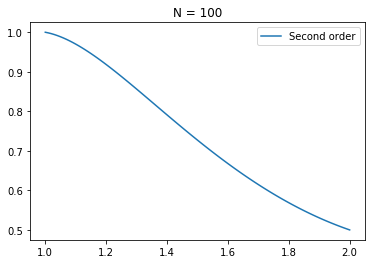

In [275]:
N = 100
y = N_OrderScheme('second',a,b,A,B,alpha,beta,p,q,f,N)

print('<=FINITE DIFFERENCE OF SECOND ORDER, N = 100=>')
x = np.linspace(a, b, N+1)
fig, ax = plt.subplots() 
ax.plot(x, y, label='Second order')
ax.set_title(f"N = {N}")
ax.legend()

## Galerkin method
Сделаем аффинное преобразование координат:

$
x \rightarrow 2(x - 1.5)
$

Уравнение приобретёт вид:

$\frac{1}{4} \frac{d^2y}{dx^2}+ \frac{dy}{dx}-3(\frac{x}{2}+1.5)y=\frac{2-8(\frac{x}{2}+1.5)}{(\frac{x}{2}+1.5)^3}$ for $x \in [-1,1]$

### Выберем базисные функции:
$
y = \phi_0(x) + \sum_{k=1}^N \phi_k(x)
$

Где $\phi_0$ удовлетворяет граничным условиям, а $\phi_k$ - функции полного базиса на $[a, b]$

$
\phi_0(x) = \frac{3}{4} -\frac{1}{4}x, \: \: \: \phi_k(x) = (x+1)(x-1)^k
$

Требуем равенства нулю интеграла:
$$
\int N(x) \phi_k dx = \int \Bigr( L[u] - f(x) dx \Bigl) \phi_k = \int \Bigr(L \left[\sum_{i=1}^N \beta_i \phi_i  \right] - f(x)\Bigl) \phi_k dx 
$$
Появляются интегралы от $\phi^{''}$, $\phi^{'}$, которые в силу выбранного базиса будут равны нулю. Тогда мы получим систему уравнений вида $Ax = b$:
$$
\sum_{i=1}^N \beta_i \int \left( \frac{1}{4} \phi^{''}_i + \phi'_i -3\left(\frac{x}{2}+1.5\right) \phi_i \right) \phi_k dx = \int f(x) \phi_k dx,
$$

$$
\sum_{i=1}^N \beta_i \int \Psi_i \phi_k dx = \int f(x) \phi_k dx,
$$

Все интегралы вычислим с помощью Гауссовых квадратур.

In [282]:
from scipy.special import roots_legendre

### По отдельности запишем компоненты Psi соответствующие разным порядком производной phi 
def Psi(x, k):
    Psi = PsiDerOrder2(x, k) + PsiDerOrder1(x, k) + PsiDerOrder1(x, k)
    return Psi

def PsiDerOrder2(x, k):
    if k == 1:
        return 2*(1/4)
    else:
        return (k*(k+1)*x+k*(k-3))*((x-1)**(k-2))*(1/4)

def PsiDerOrder1(x, k):    
    return ((k+1)*x+k-1)*(x-1)**(k-1)
    
def PsiDerOrder0(x, k):
    return -3*(x/2+3/2)*phi(x, k)

def phi(x, k):
    return (x+1)*(x-1)**k

def f(x, k):
    return (2-8*(x/2 + 3/2))/(x/2+3/2)**3

def ScalarProd(f, i, g, k, N=100):
    """Считаем скалярное произведение двух функций на отрезке методом Гауссовых квадратур"""
    """Функция f имеет индекс i, функция g имеет индекс k"""
    roots, mu = roots_legendre(N, mu=False)
    integral = 0
    for n in range(N): 
        integral+=f(roots[n], i)*g(roots[n], k)*mu[n]
    return integral

In [283]:
"""Идеология использования метода такова:
1) В общем виде у нас есть Psi(phi, p, q), phi и f
2) Мы руками пишем функции Psi и f, перенося уравнение аффинным преобразованием на [-1, 1], выбираем phi
3) Находим все интегралы через Гауссовы квадратуры (в функцию интеграла руками выписываем правильные полиномы,
учитывая вид функций)
4) Храним результат как есть. При использовании функции y (допустим, для вывода на график) 
учитываем аффинное преобразование"""

def GalerkinSolve(Psi, phi, f, N):
    """<=Construct matrix and vector of system: Ax = b=>"""
    A = np.reshape( np.asarray( [ScalarProd(Psi, i+1, phi, k+1) for i in range(N) for k in range(N)] ), (N, N) )
    b = np.asarray( [ScalarProd(f, -1, phi, k+1) for k in range(N)] )
    
    x = solve(A,b)
    
    return x

<=GALERKIN METHOD, N = 5=>


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: LinAlgWarning: Ill-conditioned matrix (rcond=3.35143e-28): result may not be accurate.
  


'Проверка начальных условий'

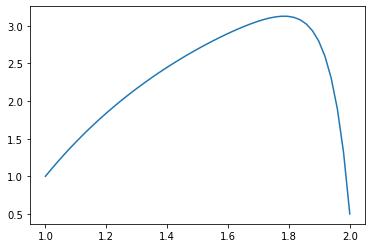

In [284]:
def phi0(x):
    return 3/4 - 1/4*x

def y(x, beta):
    y = 0
    for k in range(beta.shape[0]):
        y+=beta[k]*phi(x, k+1)
    y+=phi0(x)
    return y

"""Выставляется нужное число базисных функций"""
N = 30
beta = GalerkinSolve(Psi, phi, f, N)
#print(beta)

print('<=GALERKIN METHOD, N = 5=>')
### Число узлов
K = 50
x = np.linspace(-1, 1, K)
fig, ax = plt.subplots() 
k = 2
### При выводе учтём аффинное преобразование
ax.plot(x/2+np.ones(K)*3/2, y(x, beta))

"""Проверка начальных условий"""
#beta = np.zeros(beta.shape[0])
#ax.plot(x, y(x, beta))

In [287]:
"""Стандартная функция GetIter, немного переписанная под метод Галеркина"""
def GetIter(N, tol):
    """Вычисляет число интерций необходимых для достижения требуемой отн. ошибки"""
    """tol - наибольшая относительная ошибка на сетке значений x"""
    ### Делаем 1-й шаг итерации
    err = 1
    beta1 = GalerkinSolve(Psi, phi, f, N)
    
    while err > tol:
        
        ### Удваиваем чтисло промежуточных узлов вдвое
        N = N*2
        beta2 = GalerkinSolve(Psi, phi, f, N)
        
        ### Ставим сетку и меряем максимальную относительную разность
        x = np.linspace(-1, 1, K)
        delta = (y(x, beta1)-y(x, beta2))/y(x, beta1)
        err = max([abs(np.max(delta)), abs(np.min(delta))])
        print(f"N = 2e{math.log(N, 2)}, error = {err}")
        
        beta1 = beta2
        
    return N

N = GetIter(2, 1e-6)

N = 2e2.0, error = 1.3015099898257811
N = 2e3.0, error = 0.21644641938311138


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: LinAlgWarning: Ill-conditioned matrix (rcond=6.68414e-21): result may not be accurate.
  


N = 2e4.0, error = 0.002646088402279236


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: LinAlgWarning: Ill-conditioned matrix (rcond=7.87055e-30): result may not be accurate.
  


N = 2e5.0, error = 9.918691200159184e-06


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: LinAlgWarning: Ill-conditioned matrix (rcond=4.686e-46): result may not be accurate.
  


N = 2e6.0, error = 4.1699225596241864e-05


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: LinAlgWarning: Ill-conditioned matrix (rcond=3.09055e-83): result may not be accurate.
  


N = 2e7.0, error = 2.4167767195916816e-05


KeyboardInterrupt: 

Для метода Галёркина со степенными базисными функциями достигается точность ~1e-5

Итак, метод Галеркина даёт иное решение, нежели метод конечных разностей. Возможные пути разбирательства:

    1) Попробовать другие ортогональные функции
    
    2) Попробовать спроецировать уравнение на другие ортогональные функции
    
    3) Применить к уравнению третий метод, например метод Ритца